**Bank Customer Churn Model**

**Objective**






*  Data Encoding
*   Feature Scaling


*  Handling Imabalance Data


1.   Random Under Sampling
2.   Random Over Sampling



*  Support vector Machine Classifier


*   Grid Search for Hyperparameter Tunning














**import Library**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [2]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [3]:
df=df.set_index('CustomerId');
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


**Describe data**

In [4]:
df.describe()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


**Data Visualization**

<Axes: >

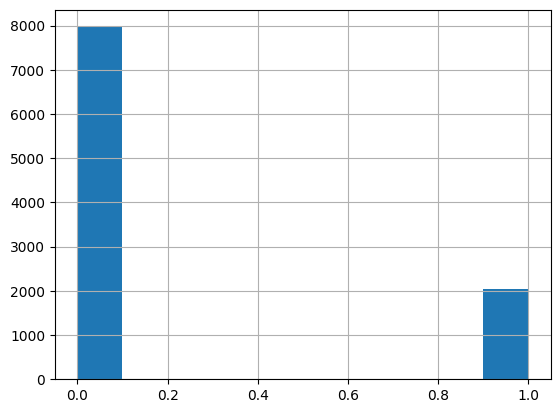

In [88]:
df['Churn'].hist()

**Data Preprocessing**

In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [8]:
df['Geography'].value_counts()

Geography
2    5014
1    2509
0    2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)
df['Gender'].value_counts()

Gender
0    5457
1    4543
Name: count, dtype: int64

In [11]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [12]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)
df['Num Of Products'].value_counts()

Num Of Products
0    5084
1    4916
Name: count, dtype: int64

In [13]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [14]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [15]:
df.loc[df['Balance']==0,'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [ ]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<Axes: >

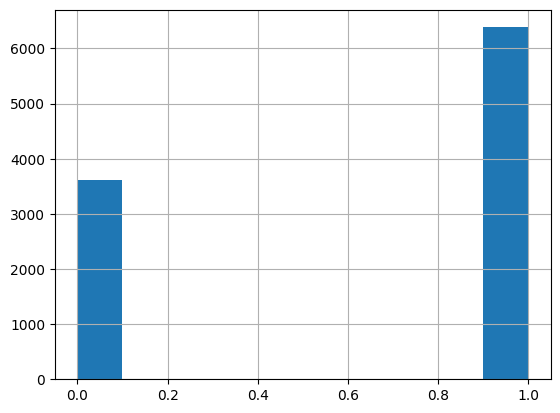

In [ ]:
df['Zero Balance'].hist()

**Define Target Variable(y) and Feature Variables(X)**

In [16]:
df.groupby(['Churn','Gender']).count()

Surname  CreditScore  Geography   Age  Tenure  Balance  \
Churn Gender                                                           
0     0          4559         4559       4559  4559    4559     4559   
      1          3404         3404       3404  3404    3404     3404   
1     0           898          898        898   898     898      898   
      1          1139         1139       1139  1139    1139     1139   

              Num Of Products  Has Credit Card  Is Active Member  \
Churn Gender                                                       
0     0                  4559             4559              4559   
      1                  3404             3404              3404   
1     0                   898              898               898   
      1                  1139             1139              1139   

              Estimated Salary  
Churn Gender                    
0     0                   4559  
      1                   3404  
1     0                    898  
      1                   1139

In [17]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,2,1,42,2,0.00,0,1,1,101348.88,1
15647311,Hill,608,0,1,41,1,83807.86,0,0,1,112542.58,0
15619304,Onio,502,2,1,42,8,159660.80,1,1,0,113931.57,1
15701354,Boni,699,2,1,39,1,0.00,1,0,0,93826.63,0
15737888,Mitchell,850,0,1,43,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,2,0,39,5,0.00,1,1,0,96270.64,0
15569892,Johnstone,516,2,0,35,10,57369.61,0,1,1,101699.77,0
15584532,Liu,709,2,1,36,7,0.00,0,0,1,42085.58,1


In [21]:
# observe the columns
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn'],
      dtype='object')

In [22]:
y=df['Churn']

In [23]:
X=df.drop(['Surname','Churn'],axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary
CustomerId,,,,,,,,,,
15634602,619,2,1,42,2,0.00,0,1,1,101348.88
15647311,608,0,1,41,1,83807.86,0,0,1,112542.58
15619304,502,2,1,42,8,159660.80,1,1,0,113931.57
15701354,699,2,1,39,1,0.00,1,0,0,93826.63
15737888,850,0,1,43,2,125510.82,0,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
15606229,771,2,0,39,5,0.00,1,1,0,96270.64
15569892,516,2,0,35,10,57369.61,0,1,1,101699.77
15584532,709,2,1,36,7,0.00,0,0,1,42085.58


In [24]:
X.shape,y.shape

((10000, 10), (10000,))

**Handling Imbalance Data**

**Random Under Sampling**

In [25]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=2529)

In [26]:
X_rus,y_rus=rus.fit_resample(X,y)

In [27]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 10), (4074,), (10000, 10), (10000,))

In [ ]:
y_rus.value_counts(),y.value_counts()

(Churn
 0    2037
 1    2037
 Name: count, dtype: int64,
 Churn
 0    7963
 1    2037
 Name: count, dtype: int64)

<Axes: >

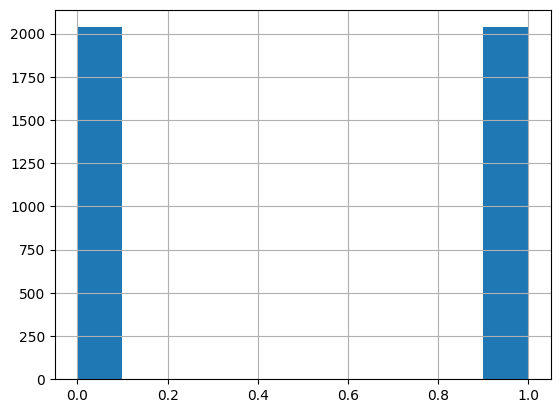

In [ ]:
y_rus.hist()

**Random Oversampling**

In [28]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=2529)

In [29]:
X_ros,y_ros=ros.fit_resample(X,y)
X_ros.shape,y_ros.shape

((15926, 10), (15926,))

In [30]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

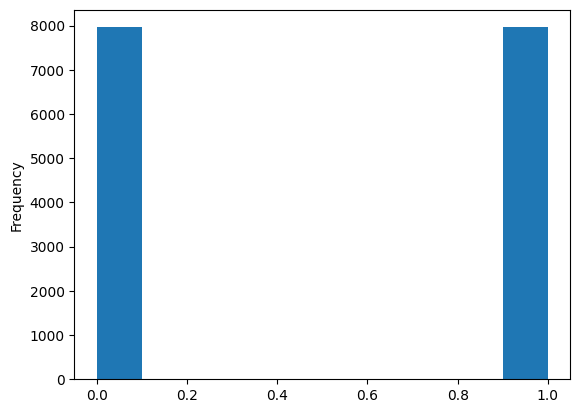

In [31]:
y_ros.plot(kind='hist')

**Train Test Split**

In [32]:
from sklearn.model_selection import train_test_split



**Split Original Data**

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((7000, 10), (7000,), (3000, 10), (3000,))

**Split Random under Sample data**

In [34]:
X_rus_train,X_rus_test,y_rus_train,y_rus_test=train_test_split(X_rus,y_rus,test_size=0.3,random_state=2529)


**Split Random Over Sample Data**

In [35]:
X_ros_train,X_ros_test,y_ros_train,y_ros_test=train_test_split(X_ros,y_ros,test_size=0.3,random_state=2529)

**Standardize Features**

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

Standardize Original data

In [37]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [38]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

Standardize random under sample data

In [39]:
X_rus_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_rus_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_rus_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_rus_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

Standardise random over sample data

In [40]:
X_ros_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_ros_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_ros_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_ros_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])


**Modeling using Support Vector machine Classifier**

model for original data

In [41]:
from sklearn.svm import SVC
svc=SVC()

model for random under sample data

In [42]:
svc_rus=SVC()

model for random over sample data

In [43]:
svc_ros=SVC()

**Training or Evaluating the model**

training using original data

In [44]:
svc.fit(X_train,y_train)

SVC()

Training the model using random under sample data

In [45]:
svc_rus.fit(X_rus_train,y_rus_train)

SVC()

Training the model using random over sample data

In [46]:
svc_ros.fit(X_ros_train,y_ros_train)

SVC()

**prediction**

**Model  Prediction using Original data**

In [47]:
y_pred=svc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

model prediction using Random under Sample data

In [48]:
y_rus_pred=svc_rus.predict(X_rus_test)


model prediction using Random over Sample data

In [49]:
y_ros_pred=svc_ros.predict(X_ros_test)

**Model accuracy**

In [50]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[2382,   32],
       [ 436,  150]])

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [52]:
confusion_matrix(y_rus_test,y_rus_pred)
print(classification_report(y_rus_test,y_rus_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [53]:
confusion_matrix(y_ros_test,y_ros_pred)
print(classification_report(y_ros_test,y_ros_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      2379
           1       0.76      0.73      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



Hyperparameter tuning using Grid **Search**

In [78]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf']}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END ........................C=1, gamma=0.01,

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [79]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


In [80]:
grid_pred=grid.predict(X_test)

In [81]:
confusion_matrix(y_test,grid_pred)

array([[2349,   65],
       [ 399,  187]])

In [82]:
print(classification_report(y_test,grid_pred) )

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2414
           1       0.74      0.32      0.45       586

    accuracy                           0.85      3000
   macro avg       0.80      0.65      0.68      3000
weighted avg       0.83      0.85      0.82      3000



In [84]:
grid.fit(X_rus_train,y_rus_train)
grid_pred=grid.predict(X_rus_test)
confusion_matrix(y_rus_test,grid_pred)
print(classification_report(y_rus_test,grid_pred))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ........................C=1, gamma=0.01,

In [85]:
grid.fit(X_ros_train,y_ros_train)
grid_pred=grid.predict(X_ros_test)
confusion_matrix(y_ros_test,grid_pred)
print(classification_report(y_ros_test,grid_pred))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   7.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   3.9s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.9s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   3.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   4.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   2.5s
[CV] END ........................C=1, gamma=0.01,

**Taking a random sample**

In [72]:
x_new=df.sample(1)
x_new=x_new.drop(['Surname','Churn'],axis=1)
x_new

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary
CustomerId,,,,,,,,,,
15602934,452,2,1,33,6,131698.57,1,1,0,151623.91


In [73]:
x_new[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_new[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [77]:
y_new_pred=svc.predict(x_new)
y_new_pred

array([0])

taking random sample using hyperparameter tuning

In [86]:
y_grid_pred=grid.predict(x_new)
y_grid_pred

array([1])

**Explaination**

The churn prediction model works by leveraging a machine learning approach to identify patterns in customer data that indicate whether a customer is likely to churn, or leave the bank. The process starts with data preprocessing, where categorical variables like geography are encoded into numerical values and the dataset is scaled to ensure all features contribute equally to the model. The model addresses the issue of imbalanced data, common in churn datasets, by applying techniques such as Random Under Sampling or Random Over Sampling to balance the number of churn and non-churn instances.

The model uses a Support Vector Machine (SVM) classifier, a robust algorithm for classification tasks, to predict churn. The SVM is trained on the preprocessed data to learn the relationships between the input features and the churn outcome. Hyperparameter tuning is performed using Grid Search to identify the best combination of parameters that enhance the model's performance. The final model is evaluated on various metrics like accuracy, precision, recall, and F1-score to ensure it effectively predicts customer churn. This allows the bank to proactively engage with at-risk customers and take measures to retain them.